In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from scipy.special import expit
%matplotlib inline

window = 288 # 1 day


In [3]:
file_name = './historic_data/BTC-USD_300_10000.csv'
# Read csv, use Time column as a datetime index, and sort by this index
df = pd.read_csv(file_name, index_col='Time', parse_dates=True, infer_datetime_format=True).sort_index()
# Resample the data to a longer time interval, keeping the OHLCV data correct
#df = df.resample('15Min').apply({'Open' : 'first', 'High' : 'max', 'Low' : 'min', 'Close' : 'last', 'Volume' : 'sum'})
# Calculate the Oracle stance
df['Stance'] = np.tanh(df['Close'].rolling(window=window,center=True).mean().diff().rolling(window=window,center=True).mean())
# https://stackoverflow.com/questions/31287552/logarithmic-returns-in-pandas-dataframe
#df['CloseGrossReturn'] = df['Close'].pct_change()
df['CloseLogReturn'] = np.log(df['Close'] / df['Close'].shift(1))
# Scale a column to have variance of 1, do not shift the mean
#df['CloseReturnVNorm'] = scale(df['CloseLogReturn'].values, with_mean=False)
#df['CloseReturnMMNorm'] = minmax_scale(df['CloseLogReturn'].values, feature_range=(0, 1))
#df['CloseReturnRNorm'] = robust_scale(df['CloseLogReturn'].values, with_centering=False)

#df['VolumeMMNorm'] = minmax_scale(df['Volume'].values, feature_range=(0, 1))
#df['StanceVNorm'] = scale(df['Stance'].values, with_mean=False)
#df['StanceMMNorm'] = minmax_scale(df['Stance'].values, feature_range=(0, 1))

df['StanceTanh'] = np.tanh(df['Stance'])
df['VolumnSigm'] = expit(df['Volume'])

# Create categorical columns from some aspect of the time
df = pd.concat([df, pd.get_dummies(df.index.weekday, prefix='DayOfWeek').set_index(df.index)], axis=1)
df = pd.concat([df, pd.get_dummies(df.index.hour, prefix='HourOfDay').set_index(df.index)], axis=1)
#df.dropna(inplace=True)
df[-7000:-6000].plot(y=['StanceMMNorm', 'CloseReturnMMNorm', 'VolumeMMNorm'], secondary_y=['CloseReturnMMNorm'], figsize=(15, 5), grid=True)
#df[-6500:-6000].plot(y=['StanceVNorm', 'CloseReturnRNorm', 'VolumeMMNorm'],figsize=(15, 5), grid=True)

df.describe()

KeyError: "None of [Index(['StanceMMNorm', 'CloseReturnMMNorm', 'VolumeMMNorm'], dtype='object')] are in the [columns]"

In [20]:
df.head()

,Low,High,Open,Close,Volume,Stance,CloseGrossReturn,CloseLogReturn,CloseReturnVNorm,CloseReturnMMNorm,...,HourOfDay_14,HourOfDay_15,HourOfDay_16,HourOfDay_17,HourOfDay_18,HourOfDay_19,HourOfDay_20,HourOfDay_21,HourOfDay_22,HourOfDay_23
Time,,,,,,,,,,,,,,,,,,,,,
2016-12-16 09:00:00,779.92,780.36,780.24,780.34,1.806340,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-12-16 09:05:00,779.95,780.82,779.95,780.82,5.345637,NaN,0.000615,0.000615,0.190808,0.674653,...,0,0,0,0,0,0,0,0,0,0
2016-12-16 09:10:00,780.51,780.82,780.82,780.82,2.675360,NaN,0.000000,0.000000,0.000000,0.672685,...,0,0,0,0,0,0,0,0,0,0
2016-12-16 09:15:00,780.53,780.82,780.82,780.76,5.917650,NaN,-0.000077,-0.000077,-0.023845,0.672439,...,0,0,0,0,0,0,0,0,0,0
2016-12-16 09:20:00,780.54,780.82,780.54,780.82,2.100960,NaN,0.000077,0.000077,0.023845,0.672931,...,0,0,0,0,0,0,0,0,0,0


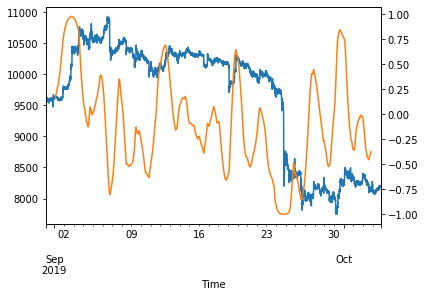

In [18]:
df.Close.plot()
df.Stance.plot(secondary_y=True)